<a href="https://colab.research.google.com/github/reworkhow/ANS198/blob/main/PCA_Visualization_Vball_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data and stats packages
import numpy as np
import pandas as pd

# Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# NEW PACKAGES
from sklearn.decomposition import PCA
from time import time


# Other packages
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings("ignore")

In [3]:
vball_df = pd.read_csv('clean_data.csv', encoding='unicode_escape')
vball_df = vball_df[vball_df.columns.difference(['index'])]
vball_df.head(50)

,block,country,date_of_birth,height,name,position_number,spike,weight
0,305,23,13/04/1998,193,Angelina Lazarenko,3,320,80
1,284,23,15/05/1996,182,Svetlana Serbina,1,295,71
2,296,23,17/06/1996,190,Ekaterina Shkurikhina,2,306,72
3,278,23,17/06/1997,176,Kristina Kurnosova,6,288,62
4,275,23,07/12/1996,181,Ekaterina Novikova,1,290,70
5,297,23,17/03/1996,186,Victoria Zhurbenko,3,306,67
6,295,23,11/02/1997,188,Angelina Sperskaite,2,305,72
7,297,23,09/02/1996,187,Anastasiia Barchuk,3,305,78
8,298,23,14/01/1996,187,Anastasiia Cheremisina,2,305,80
9,300,23,31/01/1997,190,Anna Lazareva,4,315,67


In [4]:
#find all the zeros and remove them
vball_df.drop(index=68,inplace=True)
vball_df.drop(index=212,inplace=True)
vball_df.drop(index=356,inplace=True)

In [5]:
vball_df.describe()

,block,country,height,position_number,spike,weight
count,429.000000,429.000000,429.000000,429.000000,429.00000,429.000000
mean,277.433566,19.706294,181.000000,2.748252,288.79021,68.727273
std,24.027017,8.498350,8.239692,1.413231,25.57722,7.367695
min,178.000000,5.000000,153.000000,1.000000,178.00000,52.000000
25%,274.000000,10.000000,175.000000,2.000000,285.00000,63.000000
50%,283.000000,23.000000,182.000000,2.000000,294.00000,69.000000
75%,292.000000,29.000000,187.000000,3.000000,304.00000,73.000000
max,310.000000,31.000000,199.000000,6.000000,336.00000,87.000000


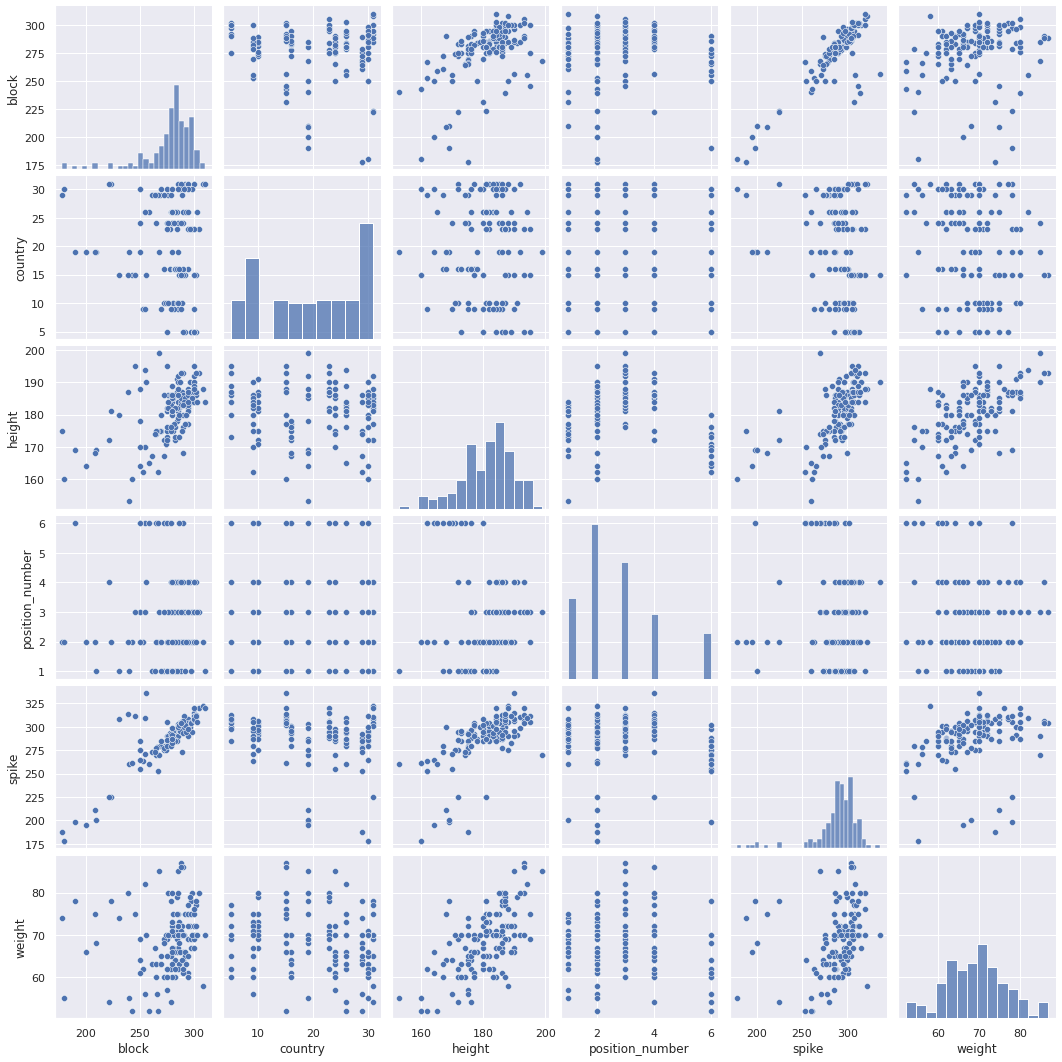

In [6]:
sns.pairplot(vball_df);

In [7]:
#make position number and country categorical variables
vball_df
vball_df['position_number']
pd.Categorical(vball_df['position_number'])
pd.Categorical(vball_df['country'])
print(vball_df['position_number'])
print(vball_df['country'])

0      3
1      1
2      2
3      6
4      1
      ..
427    2
428    3
429    1
430    1
431    3
Name: position_number, Length: 429, dtype: int64
0      23
1      23
2      23
3      23
4      23
       ..
427    26
428    26
429    26
430    26
431    26
Name: country, Length: 429, dtype: int64


In [8]:
#separating the quantitative predictors from the model of the car (a string)
#model = cars_df['model']
position_number = vball_df['position_number']
country = vball_df['country']
quant_df = vball_df[vball_df.columns.difference(['position_number'])]
quant_df = vball_df[vball_df.columns.difference(['country'])]
quant_df=vball_df[['height','weight','spike','block',]]

# Standardization
quant_scaled = StandardScaler().fit_transform(quant_df)
vball_df_scaled = pd.DataFrame(quant_scaled, columns=quant_df.columns)

# We can bring back the model variable, although we do not need it
vball_df_scaled['position_number'] = vball_df['position_number']
vball_df_scaled['country'] = vball_df['country']
vball_df_scaled.head()

,height,weight,spike,block,position_number,country
0,1.458065,1.531807,1.221643,1.148649,3.0,23.0
1,0.121505,0.308832,0.243069,0.273613,1.0,23.0
2,1.093549,0.444718,0.673642,0.773634,2.0,23.0
3,-0.607527,-0.914143,-0.030931,0.023602,6.0,23.0
4,0.000000,0.172946,0.047355,-0.101403,1.0,23.0


In [9]:
vball_df_scaled.describe()

,height,weight,spike,block,position_number,country
count,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,426.000000,426.000000
mean,2.536174e-17,-8.996300e-16,-9.681455e-16,-8.679925e-16,2.755869,19.661972
std,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00,1.413057,8.511767
min,-3.402153e+00,-2.273004e+00,-4.336654e+00,-4.143238e+00,1.000000,5.000000
25%,-7.290327e-01,-7.782570e-01,-1.483599e-01,-1.430712e-01,2.000000,10.000000
50%,1.215055e-01,3.705986e-02,2.039265e-01,2.319444e-01,2.000000,21.000000
75%,7.290327e-01,5.806044e-01,5.953559e-01,6.069601e-01,3.000000,29.000000
max,2.187098e+00,2.483010e+00,1.847930e+00,1.356991e+00,6.000000,31.000000


In [10]:
# drop again the model predictor
vball_df_scaled = vball_df_scaled[vball_df_scaled.columns.difference(['position_number'])]
vball_df_scaled = vball_df_scaled[vball_df_scaled.columns.difference(['country'])]
quant_df = vball_df_scaled 

# fitting the PCA object onto our dataframe (excluding the model name column)
pca = PCA().fit(quant_df)

# transforming the dataframe
quant_df_pca = pca.transform(quant_df)

print('Original dimensions:', quant_df.shape)
print('PCA dimensions:     ', quant_df_pca.shape)

Original dimensions: (429, 4)
PCA dimensions:      (429, 4)


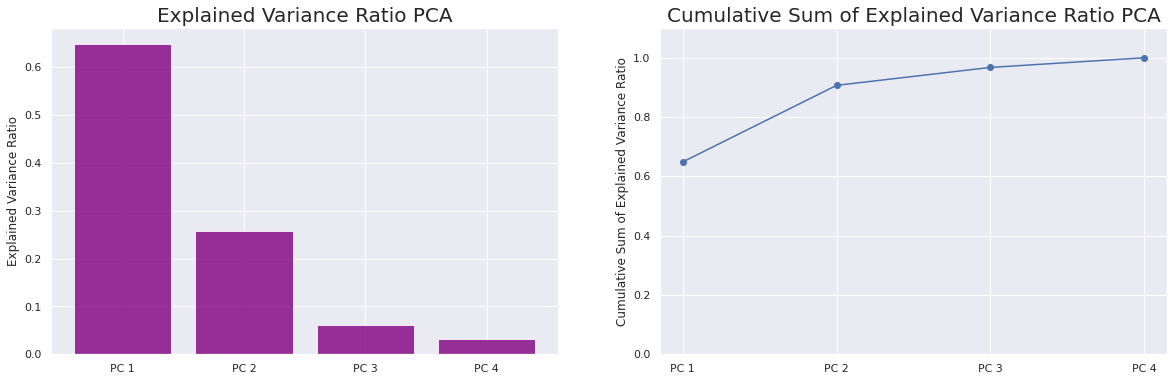

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax1, ax2 = ax.ravel()

ratio = pca.explained_variance_ratio_
ax1.bar(range(len(ratio)), ratio, color='purple', alpha=0.8)
ax1.set_title('Explained Variance Ratio PCA', fontsize=20)
ax1.set_xticks(range(len(ratio)))
ax1.set_xticklabels(['PC {}'.format(i+1) for i in range(len(ratio))])
ax1.set_ylabel('Explained Variance Ratio')

# ratio[0]=0
ratio = pca.explained_variance_ratio_
ax2.plot(np.cumsum(ratio), 'o-')

ax2.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)

ax2.set_ylim(0,1.1)
ax2.set_xticks(range(len(ratio)))
ax2.set_xticklabels(['PC {}'.format(i+1) for i in range(len(ratio))])
ax2.set_ylabel('Cumulative Sum of Explained Variance Ratio');

In [12]:
for i, comp in enumerate(pca.components_):
    expression = 'Z_{} = '.format(i+1)
    for c, x in zip(comp, quant_df.columns):
        if c < 0:
            expression += str(np.round(c,2)) + '*' + x + ' '
        else:
            expression += '+' + str(np.round(c,2)) + '*' + x + ' '
    print(expression + '\n')

Z_1 = -0.52*block -0.54*height -0.56*spike -0.36*weight 

Z_2 = -0.47*block +0.3*height -0.35*spike +0.75*weight 

Z_3 = -0.28*block +0.78*height -0.13*spike -0.55*weight 

Z_4 = -0.66*block -0.12*height +0.74*spike -0.02*weight 



In [13]:
vec1 = pca.components_[0]
vec2 = pca.components_[1]

# print(np.dot(vec1.T, vec2))
print('The dot product between the first two principal components is ',np.round(np.dot(vec1, vec2),5))
print('The length of the first  principal component is ',np.round(np.dot(vec1, vec1),5))

The dot product between the first two principal components is  0.0
The length of the first  principal component is  1.0


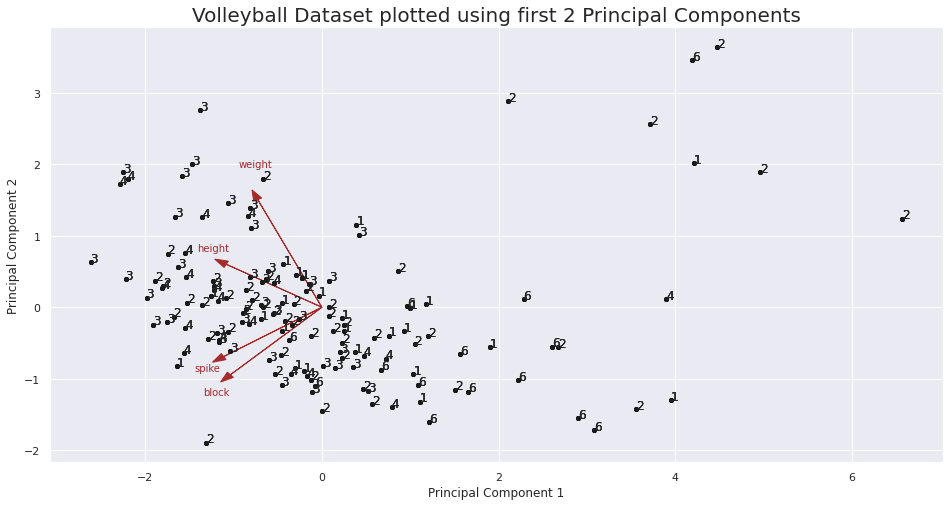

In [14]:
# to plot vectors from the center
vecs = pca.components_[0:10].T *2

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(quant_df_pca[:,0], quant_df_pca[:,1], 'ok', markersize=4)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Volleyball Dataset plotted using first 2 Principal Components', fontsize=20)

# plotting arrowheads of the original axes projected on the 2D PCA space
for i, vec in enumerate(vecs):
    ax.arrow(0,0,vec[0],vec[1], color='brown', head_width=0.1)
    s = 1.3
    ax.annotate(quant_df.columns[i], (s*vec[0], s*vec[1]), color='brown')

# annotating text for position number
for i, txt in enumerate(vball_df['position_number']):
    ax.annotate(txt, (quant_df_pca[:,0][i], quant_df_pca[:,1][i]), size=12)

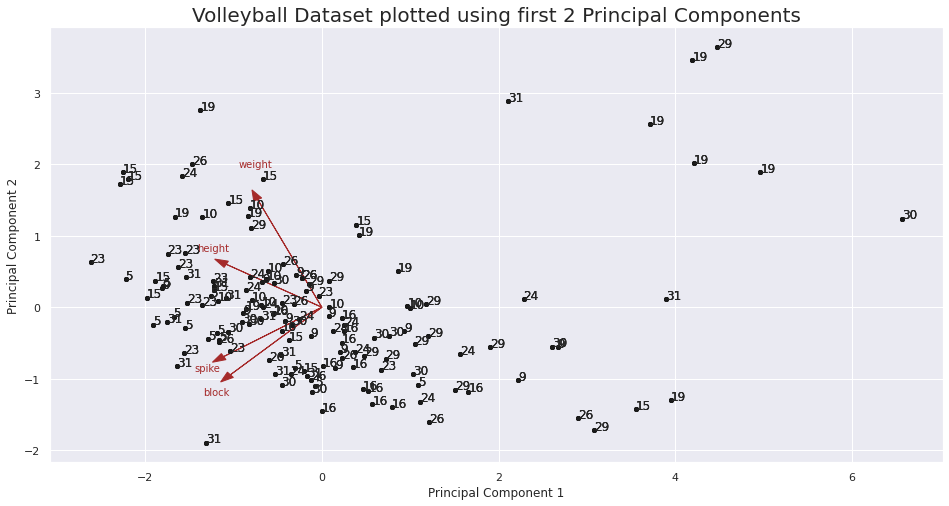

In [54]:
# to plot vectors from the center
vecs = pca.components_[0:10].T *2

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(quant_df_pca[:,0], quant_df_pca[:,1], 'ok', markersize=4)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Volleyball Dataset plotted using first 2 Principal Components', fontsize=20)

# plotting arrowheads of the original axes projected on the 2D PCA space
for i, vec in enumerate(vecs):
    ax.arrow(0,0,vec[0],vec[1], color='brown', head_width=0.1)
    s = 1.3
    ax.annotate(quant_df.columns[i], (s*vec[0], s*vec[1]), color='brown')

# annotating text for country
for i, txt in enumerate(vball_df['country']):
    ax.annotate(txt, (quant_df_pca[:,0][i], quant_df_pca[:,1][i]), size=12)

In [33]:

# trying to match with the volleyball data to plot labels on the points, but I am confused on
p_number_list = vball_df['position_number']
c_number_list = vball_df['country']

In [ ]:
len(p_number_list)
len(c_number_list)
c_number_list

0      23
1      23
2      23
3      23
4      23
       ..
427    26
428    26
429    26
430    26
431    26
Name: country, Length: 429, dtype: int64

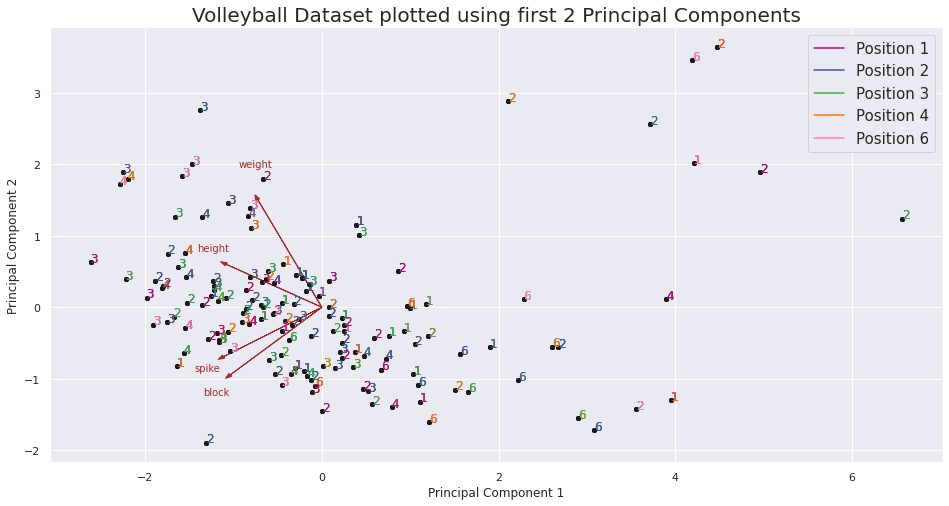

In [75]:
fig, ax = plt.subplots(figsize=(16,8))

# main plot
ax.plot(quant_df_pca[:,0], quant_df_pca[:,1], 'ok', markersize=4)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Volleyball Dataset plotted using first 2 Principal Components', fontsize=20)

# plotting arrowheads
for i, vec in enumerate(vecs):
    ax.arrow(0,0,vec[0],vec[1], color='brown', head_width=0.05)
    s = 1.3
    ax.annotate(quant_df.columns[i], (s*vec[0], s*vec[1]), color='brown')

# plotting names
cs = [sns.xkcd_rgb["magenta"], sns.xkcd_rgb["denim blue"], sns.xkcd_rgb["medium green"], sns.xkcd_rgb["orange"], sns.xkcd_rgb["pink"]]
colors = {1: cs[0], 2: cs[1], 3: cs[2], 4: cs[3], 6: cs[4]}

# dummy plots to show up in the legend
ax.plot(0,0, color=cs[0], label='Position 1')
ax.plot(0,0, color=cs[1], label='Position 2')
ax.plot(0,0, color=cs[2], label='Position 3')
ax.plot(0,0, color=cs[3], label='Position 4')
ax.plot(0,0, color=cs[4], label='Position 6')
ax.legend(fontsize=15);

# plotting text with color
for i, txt in enumerate(vball_df['position_number']):
  if i not in [68, 212, 356] :
    p_number = p_number_list[i]
    ax.annotate(txt, (quant_df_pca[:,0][i], quant_df_pca[:,1][i]), color = colors[p_number], size=12)
ax.legend(fontsize=15);